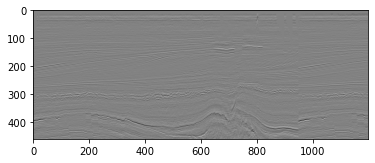

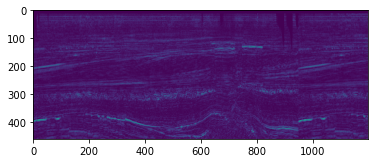

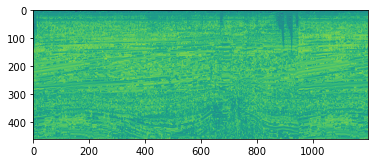

In [5]:
import segyio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Load SGY data using segyio
with segyio.open('Seismic_data.sgy', ignore_geometry=True) as f:
    # Get a NumPy array of all traces
    seismic_data = segyio.tools.collect(f.trace[:])

# Select a specific section of the seismic data
section = seismic_data[1:1200, 1:1000]

# Compute amplitude attribute
amplitude = np.abs(section)

# Compute the analytic signal of the data
analytic_signal = signal.hilbert(section)

# Compute the instantaneous phase and unwrap it
inst_phase = np.unwrap(np.angle(analytic_signal))

# Compute the instantaneous frequency attribute
inst_freq = np.diff(inst_phase) / (2* np.pi) 

# Display section using matplotlib
plt.imshow(section.T, cmap='gray')
plt.show()

# Display the amplitude attribute as an image
plt.imshow(amplitude.T)
plt.show()

# Display the instantaneous frequency attribute image for a specific time sample
plt.imshow(inst_freq.T)
plt.show()